13
10
None


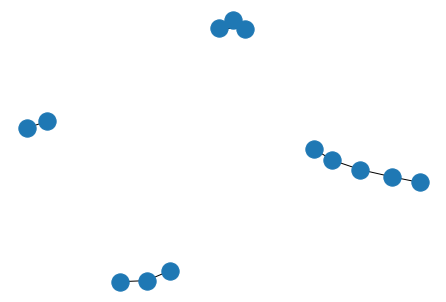

In [1]:
import networkx as nx
import csv as csv
import itertools as its
import matplotlib as mt

#Read in the edge csv, create the graph from the edges
G = nx.read_edgelist("EdgeList.csv", delimiter = ",", create_using = nx.Graph(), nodetype = str, data=True, edgetype=str)

#How many nodes and edges do we have?
print(G.number_of_nodes())
print(G.number_of_edges())
#print the specific edges and nodes
#print(G.nodes())
#print(G.edges())

#Draw the graph. (This won't be pretty if you have a lot of nodes)
print(nx.draw(G))

#Other option for drawing the graph
#print(nx.draw_networkx(G, with_labels=True, node_size=250))

In [2]:
#now we want to get our connected components. aka: our customer groups
Customers = nx.connected_components(G)

Customer_list = []
for Customer in Customers:
    Customer_list.append(Customer)
print(Customer_list)

[{'2', '3', '5', '4', '1'}, {'6', '7'}, {'8', '10', '9'}, {'13', '12', '11'}]


In [3]:
#Now we want to give our Customer groups an ID (the clique number) and print out a new file. 
#Clique is another name for a group not connected to any other groups
#We are creating a row for each connection from "A" to "B", and a row for "B" to "A"

with open("CustomerList.csv", "tw") as file:
    w = csv.writer(file, delimiter=',', lineterminator = '\n')
    w.writerow(["node1", "node2", "clique number"])
    w.writerows(p + (i,) for i, n in enumerate(Customer_list, 1) for p in its.permutations(n,2))

